In [20]:

import numpy as np           
# installation de mpl_toolkits pour tracer des frontière (non utilisé pour le moment)
# Si GEOS est installé de manière standard, suivre la procédure suivante sous linux
# Télécharger les sources https://github.com/matplotlib/basemap/archive/refs/tags/v1.3.3.tar.gz
# tar -xvf basemap-1.3.3.tar.gz
# cd basemap-1.3.3/packages/basemap
# python3 -m pip install .
# En cas de problème,  voir https://matplotlib.org/basemap/users/installing.html
# Tout ça est assez lourd
#from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
from scipy.interpolate import griddata

import plotly.graph_objects as go
import IPython

import gstlearn as gl
from numpy import pi, cos, sin





## Simulation

In [21]:
gl.variety_define(1,1)

mesh = gl.MeshSpherical()
mesh.reset(None,None,triswitch = "-r5",verbose=False)

X = mesh.getCoordinates(0)
Y = mesh.getCoordinates(1)

db = gl.Db.create()
db["long"]=X
db["long"] = db["long"]-180. #Attention à Mesh barycenter
db["lat"]=Y

db.setLocators(["long","lat"],gl.ELoc.X)

model = gl.Model.createFromParam(gl.ECov.BESSEL_K,range=50,param=1)
S=gl.ShiftOpCs(mesh,model)
whitenoise = gl.ut_vector_simulate_gaussian(mesh.getNApices())
result = gl.VectorDouble(mesh.getNApices())
Q = gl.PrecisionOpCs(S,model.getCova(0),gl.EPowerPT.MINUSHALF)
Q.eval(whitenoise,result)


In [22]:

def get_lims_colors(surfacecolor):# color limits for a slice
    return np.min(surfacecolor), np.max(surfacecolor)

def colorax(vmin, vmax):
    return dict(cmin=vmin,
                cmax=vmax)


def mapping_map_to_sphere(lon, lat,radius=1.):
    #this function maps the points of coords (lon, lat) to points onto the  sphere of radius radius
    xs=radius*np.cos(lon)*np.cos(lat)
    ys=radius*np.sin(lon)*np.cos(lat)
    zs=radius*np.sin(lat)
    return xs, ys, zs


def d2r(x):
    return x * np.pi / 180.


In [23]:
nlong = 200
nlat = 100


lon = np.linspace(d2r(db["long"].min()), d2r(db["long"].max()), nlong)
lat   = np.linspace(d2r( db["lat"].min()), d2r( db["lat"].max()),  nlat)
lon, lat = np.meshgrid(lon, lat)
lon = lon.T
lat = lat.T
grd = griddata(np.stack([d2r(db["long"]),d2r(db["lat"])])[:,:,0].T,
                np.array(result),
                np.stack([lon,lat]).transpose(1,2,0).reshape(nlong*nlat,2)
              )

xs,ys,zs = mapping_map_to_sphere(lon,lat)
sminz, smaxz = get_lims_colors(grd)

fig = go.Figure(go.Surface(x=xs, y=ys, z=zs, 
                 surfacecolor=grd.reshape(nlong,nlat)))


fig.update_layout(
         title_text='Slices in volumetric data', 
         title_x=0.5,
         width=700,
         height=700,
         coloraxis=dict(colorscale='BrBG',
                        colorbar_thickness=25,
                        colorbar_len=0.75,
                        **colorax(sminz, smaxz))
)


In [2]:
long = db["long"]
lat = db["lat"]
xi = np.linspace(long.min(), long.max(), 100)
yi = np.linspace(lat.min(), lat.max(), 100)

X,Y = np.meshgrid(xi,yi)


grd = griddata(np.array([db["long"],db["lat"]])[:,::,0].T,
                np.array(result).T,
                np.array([X,Y]).T,
                method='cubic')


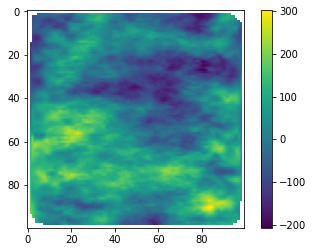

In [3]:
plt.imshow(grd)
plt.colorbar()

In [1]:
import numpy as np
import plotly.graph_objects as go
import IPython
import gstlearn as gl
import gstlearn.plot as gp
import matplotlib.pyplot as plt

from numpy import pi, cos, sin

theta = np.linspace(0, 2*pi, 72)
phi = np.linspace(-pi/2, pi/2, 36)
theta, phi = np.meshgrid(theta, phi)
x = cos(theta) * cos(phi)
y = sin(theta) * cos(phi)
z = sin(phi)

power = np.random.randint(2, 10, theta.shape)
customdata = np.stack((theta, phi, power), axis=-1)


fig = go.Figure(go.Surface(x=x, y=y, z=z, 
                 surfacecolor=power))


fig.update_layout(
         title_text='Slices in volumetric data', 
         title_x=0.5,
         width=700,
         height=700,
         coloraxis=dict(colorscale='BrBG',
                        colorbar_thickness=25,
                        colorbar_len=0.75)
                        )
fig.show()

In [62]:
long = db["long"]
lat = db["lat"]
a=long/180*np.pi
a=phi
print(a.min())
print(a.max())

np.stack([db["long"].T,db["lat"].T])[:,0,:].T

-1.5620215245578688
1.5620215245578688


array([[ 2.72620258e+02, -3.31747421e+01],
       [ 3.97139169e+00, -6.67689139e+01],
       [ 2.81709372e+02,  7.88392861e+01],
       ...,
       [ 9.35556070e+01, -5.04057325e+01],
       [ 2.20854875e+02, -1.00842623e-01],
       [ 1.02458199e+02, -5.60483306e+01]])